# **I. INTRODUCTION**

Name: **Muhammad Fattahillah**

Project: **Create a Machine Learning Model to Predict Whether a Client Will Default on His Credit Card in the Next Month and Analyze the Data to Identify Significant Factors That Influence the Probability of Credit Card Default.**

Dataset: **ML Datasets - Credit Card Default**

Link: *https://console.cloud.google.com/bigquery?ws=!1m5!1m4!4m3!1sbigquery-public-data!2sml_datasets!3scredit_card_default*

### **BACKGROUND STORY**

How does the credit card system work?

Every month, you receive a bill (X) that reflects your credit card spending.
You make payment (Y), usually the minimum amount due, on the due date stated on the billing statement.

The next month's bill includes the remaining balance from the previous month (X - Y) plus any new costs (X') incurred in that month.

You make another payment (Y') to cover part of the new bill.
This cycle repeats itself, with each month's bill combining previous balances, new expenses, and reduced payments.
Missing the minimum payment due date results in late payments, often accompanied by late fees. Additionally, persistent delays can result in payment default

What is a defaulter?

A person is considered a defaulter by the bank when they fail to make the required payments on their credit card or loan according to agreed terms. In the context of credit cards, default usually occurs when the cardholder misses the minimum payment on the due date specified in the statement.

source: https://www.investopedia.com/how-do-credit-card-payments-work-5069924

### **MAIN OBJECTIVE**

The main aim of this project is to find out what factors influence whether a client will be called a defaulter or will fail to pay next month. After knowing the factors that significantly influence this, later I will create a machine learning model that can predict whether someone will default next month using the machine learning model Logistic Regression, Support Vector Machine Classifier, and K Nearest Neighbors.

---

# **II. QUERY SQL**

This is a sql query that I did to get data from a big query.

In [1]:
'''
SELECT
  limit_balance,
  CAST(sex AS INT64) as sex,
  CAST(education_level AS INT64) as education_level,
  CAST(marital_status AS INT64) as marital_status,
  age,
  pay_0,
  pay_2,
  pay_3,
  pay_4,
  CAST(pay_5 AS FLOAT64) as pay_5,
  CAST(pay_6 AS FLOAT64) as pay_6,
  bill_amt_1,
  bill_amt_2,
  bill_amt_3,
  bill_amt_4,
  bill_amt_5,
  bill_amt_6,
  pay_amt_1,
  pay_amt_2,
  pay_amt_3,
  pay_amt_4,
  pay_amt_5,
  pay_amt_6,
  CAST(default_payment_next_month AS INT64) as default_payment_next_month
FROM
  `bigquery-public-data.ml_datasets.credit_card_default`
LIMIT 43912;
'''

'\nSELECT\n  limit_balance,\n  CAST(sex AS INT64) as sex,\n  CAST(education_level AS INT64) as education_level,\n  CAST(marital_status AS INT64) as marital_status,\n  age,\n  pay_0,\n  pay_2,\n  pay_3,\n  pay_4,\n  CAST(pay_5 AS FLOAT64) as pay_5,\n  CAST(pay_6 AS FLOAT64) as pay_6,\n  bill_amt_1,\n  bill_amt_2,\n  bill_amt_3,\n  bill_amt_4,\n  bill_amt_5,\n  bill_amt_6,\n  pay_amt_1,\n  pay_amt_2,\n  pay_amt_3,\n  pay_amt_4,\n  pay_amt_5,\n  pay_amt_6,\n  CAST(default_payment_next_month AS INT64) as default_payment_next_month\nFROM\n  `bigquery-public-data.ml_datasets.credit_card_default`\nLIMIT 43912;\n'

---

# **III. IMPORT LIBRARIES**

In creating a project in a Python notebook, the first thing you have to do is import **or determine the **features** from the library that you want to use later in the project. This process is done to ensure the **features** This can later be carried out during the data **analysis** process and the **machine learning model** creation process.

In [2]:
# Base:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

# Model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Hyperparameter tuning:
from sklearn.model_selection import GridSearchCV

# Evaluation
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score, precision_score, recall_score

# Save mode
import joblib
import json

import warnings
warnings.filterwarnings('ignore')

---

# **IV. DATA LOADING**

After determining the features of the library that will be used in the project, the next step is to call/load the data that will be analyzed and create a machine learning model.

### **1. LOAD FILE**

In [3]:
# Read the CSV file and define it as df:
df = pd.read_csv('P1G5_Set_1_muhammad-fattahillah.csv')

In [4]:
# View the first 10 data:
df.head(10)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,80000.0,1,6,1,54.0,0.0,0.0,0.0,0.0,0.0,...,29296.0,26210.0,17643.0,2545.0,2208.0,1336.0,2232.0,542.0,348.0,1
1,200000.0,1,4,1,49.0,0.0,0.0,0.0,0.0,0.0,...,50146.0,50235.0,48984.0,1689.0,2164.0,2500.0,3480.0,2500.0,3000.0,0
2,20000.0,2,6,2,22.0,0.0,0.0,0.0,0.0,0.0,...,1434.0,500.0,0.0,4641.0,1019.0,900.0,0.0,1500.0,0.0,1
3,260000.0,2,4,2,33.0,0.0,0.0,0.0,0.0,0.0,...,27821.0,30767.0,29890.0,5000.0,5000.0,1137.0,5000.0,1085.0,5000.0,0
4,150000.0,1,4,2,32.0,0.0,0.0,0.0,-1.0,0.0,...,150464.0,143375.0,146411.0,4019.0,146896.0,157436.0,4600.0,4709.0,5600.0,0
5,300000.0,2,4,2,32.0,0.0,0.0,0.0,0.0,0.0,...,65150.0,-450.0,700.0,15235.0,1491.0,1303.0,0.0,2000.0,1400.0,0
6,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0.0,...,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
7,200000.0,1,1,1,58.0,0.0,0.0,0.0,0.0,0.0,...,124647.0,126921.0,129167.0,7822.0,4417.0,4446.0,4597.0,4677.0,4698.0,0
8,500000.0,1,1,1,39.0,0.0,0.0,0.0,0.0,0.0,...,174500.0,137406.0,204975.0,54209.0,4607.0,4603.0,5224.0,207440.0,7509.0,0
9,230000.0,1,1,1,48.0,0.0,0.0,0.0,0.0,0.0,...,105508.0,108101.0,110094.0,7000.0,6607.0,3773.0,4290.0,4164.0,2000.0,0


In [5]:
# View the last 10 data:
df.tail(10)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2955,360000.0,2,2,2,26.0,-1.0,-1.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,463.0,2500.0,0.0,0.0,0.0,0.0,0
2956,100000.0,1,3,1,40.0,0.0,0.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,2000.0,2377.0,40000.0,0.0,0.0,0.0,0
2957,30000.0,2,3,1,48.0,1.0,-1.0,-1.0,-2.0,-2.0,...,0.0,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,0
2958,80000.0,2,3,1,39.0,-1.0,-1.0,-1.0,-1.0,-2.0,...,0.0,0.0,5000.0,5000.0,5000.0,0.0,5000.0,5000.0,470.0,0
2959,20000.0,1,3,2,26.0,-1.0,-1.0,-1.0,-2.0,-2.0,...,0.0,0.0,0.0,1560.0,0.0,0.0,0.0,0.0,0.0,0
2960,80000.0,2,3,2,28.0,-1.0,-1.0,-1.0,-2.0,-2.0,...,0.0,0.0,0.0,2800.0,0.0,0.0,0.0,0.0,0.0,0
2961,50000.0,2,3,1,51.0,-1.0,-1.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,300.0,5880.0,0.0,0.0,0.0,0.0,1
2962,450000.0,2,2,1,38.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,390.0,390.0,390.0,390.0,780.0,390.0,390.0,390.0,390.0,1
2963,50000.0,2,2,1,44.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,390.0,390.0,0.0,390.0,390.0,390.0,390.0,0.0,780.0,0
2964,290000.0,2,2,1,39.0,1.0,-2.0,-2.0,-2.0,-2.0,...,3184.0,390.0,390.0,10000.0,800.0,3184.0,390.0,390.0,6617.0,0


***Insight:***

*This dataset contains information about credit card defaults, demographic factors, credit data, payment history, and credit card client billing statements.*

### **2. DATASET SUMMARY**

In [6]:
# View a summary of the dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   limit_balance               2965 non-null   float64
 1   sex                         2965 non-null   int64  
 2   education_level             2965 non-null   int64  
 3   marital_status              2965 non-null   int64  
 4   age                         2965 non-null   float64
 5   pay_0                       2965 non-null   float64
 6   pay_2                       2965 non-null   float64
 7   pay_3                       2965 non-null   float64
 8   pay_4                       2965 non-null   float64
 9   pay_5                       2965 non-null   float64
 10  pay_6                       2965 non-null   float64
 11  bill_amt_1                  2965 non-null   float64
 12  bill_amt_2                  2965 non-null   float64
 13  bill_amt_3                  2965 

***Insight:***

*1. **limit_balance**: This is the maximum amount information allowed on a credit card.*

*2. **sex**: This is information about the gender of the credit card holder.*

*3. **education_level**: This is the credit card holder's education level.*

*4. **marital_status**: This is the credit card holder's marital status.*

*5. **age**: This is the age of the credit card holder.*

*6. **pay_0, pay_2, pay_3, pay_4, pay_5, pay_6**: These columns may refer to the previous month's payment status (pay_0) to the previous month's payment status (pay_6). Values in this column may indicate late or timely payment of credit card bills.*

*7. **bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6**: This is the amount of the previous month's bill (bill_amt) from the first month (bill_amt_1) to the sixth month ago (bill_amt_6).*

*8. **pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6**: These columns may refer to the number of payments made by the credit card holder for the first month (pay_amt_1) to the sixth month ago (pay_amt_6).*

*9. **default_payment_next_month**: This is an indicator of whether the credit card holder will default or not.*

***This data is used to analyze credit card payment behavior and identify factors that can influence whether someone will make their next credit card payment correctly or default.***

---

# **V. EXPLORATORY DATA ANALYSIS (EDA)**

After carrying out a brief analysis of the data, now a more in-depth analysis will be carried out regarding:

### **1. DUPLICATED DATA CHECK**

In [7]:
# Check for duplication based on all columns:
duplicates = df[df.duplicated()]

if duplicates.shape[0] > 0:
    print(f"Total {duplicates.shape[0]} entry duplikasi ditemukan.")
    print("Entry duplikasi:")
    print(duplicates)
else:
    print("Tidak ada entry yang duplikasi pada data ini.")

Total 1 entry duplikasi ditemukan.
Entry duplikasi:
      limit_balance  sex  education_level  marital_status   age  pay_0  pay_2  \
2815       200000.0    2                1               1  34.0    1.0   -2.0   

      pay_3  pay_4  pay_5  ...  bill_amt_4  bill_amt_5  bill_amt_6  pay_amt_1  \
2815   -2.0   -2.0   -2.0  ...         0.0         0.0         0.0        0.0   

      pay_amt_2  pay_amt_3  pay_amt_4  pay_amt_5  pay_amt_6  \
2815        0.0        0.0        0.0        0.0        0.0   

      default_payment_next_month  
2815                           0  

[1 rows x 24 columns]


In [8]:
# Removing duplicate data:
df = df.drop_duplicates()

In [9]:
# Check for duplication based on all columns:
duplicates = df[df.duplicated()]

if duplicates.shape[0] > 0:
    print(f"Total {duplicates.shape[0]} entry duplikasi ditemukan.")
    print("Entry duplikasi:")
    print(duplicates)
else:
    print("Tidak ada entry yang duplikasi pada data ini.")

Tidak ada entry yang duplikasi pada data ini.


***Insight:***

*The results above show that the duplicate data has been successfully deleted.*

### **2. STATISTICS DESCRIPTIVE**

In [10]:
# View summary statistics from numeric columns in data:
df.describe()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
count,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,...,2964.000000,2964.000000,2964.000000,2964.000000,2.964000e+03,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000
mean,163356.950067,1.607625,1.849865,1.560054,35.193657,0.004723,-0.121795,-0.141026,-0.184548,-0.224696,...,44104.558367,40969.898448,39786.491228,6351.044872,6.274611e+03,5152.234818,4562.914980,4914.944332,5384.517544,0.214238
std,125049.701016,0.488362,0.778159,0.522304,9.110949,1.114434,1.180479,1.183337,1.178049,1.158739,...,61912.600106,58276.878626,57308.498646,20888.933729,2.888432e+04,14289.177313,13283.476236,16736.920951,17278.585006,0.410362
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-46627.000000,-46627.000000,-73895.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2585.000000,1974.500000,1433.000000,1013.000000,9.975000e+02,479.250000,313.750000,325.250000,175.250000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19895.000000,18819.500000,18511.500000,2238.000000,2.182500e+03,1997.000000,1600.000000,1646.500000,1626.500000,0.000000
75%,230000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58638.500000,53414.500000,52297.000000,5089.500000,5.000000e+03,4500.000000,4000.250000,4021.000000,4081.750000,0.000000
max,800000.000000,2.000000,6.000000,3.000000,69.000000,8.000000,7.000000,7.000000,8.000000,7.000000,...,488808.000000,441981.000000,436172.000000,493358.000000,1.227082e+06,199209.000000,202076.000000,388071.000000,403500.000000,1.000000


***Insight:***
- *The average credit card limit is $163356. The standard deviation is extraordinarily large at $125049, the minimum value is $10000, the maximum value is $800000.*

- *Most of the educational levels are graduate school and university.*

- *Most of the clients are married and single, while for others it is very rare.*

- *The average age is 35 years, with a standard deviation of 9.2 which indicates that client ages tend to have quite large variations.*

- *Because a value of 0 for default payment means 'no default' and a value of 1 means 'default', then an average of 0.214 means that 21.4% of credit card contracts will default next month (to be verified further).*

### **3. CARDINALITY CHECK**

In [11]:
# Check the number of unique values for each column:
for col in df.columns:
    print(col, df[col].nunique())

limit_balance 59
sex 2
education_level 7
marital_status 4
age 49
pay_0 11
pay_2 10
pay_3 9
pay_4 10
pay_5 9
pay_6 8
bill_amt_1 2643
bill_amt_2 2592
bill_amt_3 2549
bill_amt_4 2504
bill_amt_5 2482
bill_amt_6 2461
pay_amt_1 1415
pay_amt_2 1372
pay_amt_3 1302
pay_amt_4 1214
pay_amt_5 1194
pay_amt_6 1189
default_payment_next_month 2


***Insight:***

*From the results above it can be seen that the cardinality level of the columns is still at a reasonable number and does not need to be handled further at this time.*

### **4. DEFAULT PAYMENT : DISTRIBUTION CHECK**

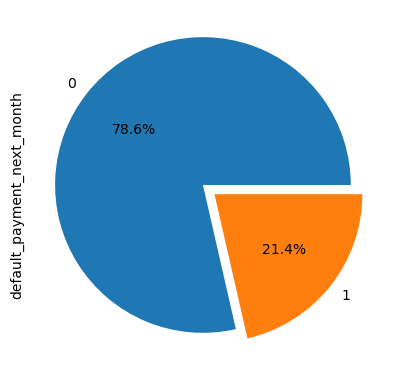

In [12]:
# Plot to see percentage of defaulters:
perc_default = df.default_payment_next_month.sum() / len(df.default_payment_next_month)
df['default_payment_next_month'].value_counts().plot(kind='pie', explode=[0.1,0],autopct="%1.1f%%")
plt.plot();

***Insight:***

*0: Normal Payment Status. | 1: Payment Status Failed.*

*From the pie chart above, it shows that the percentage of clients who fail to pay in the data is 21.4%*

### **5. LIMIT BALANCE X DEFAULT PAYMENT : DISTRIBUTION CHECK**

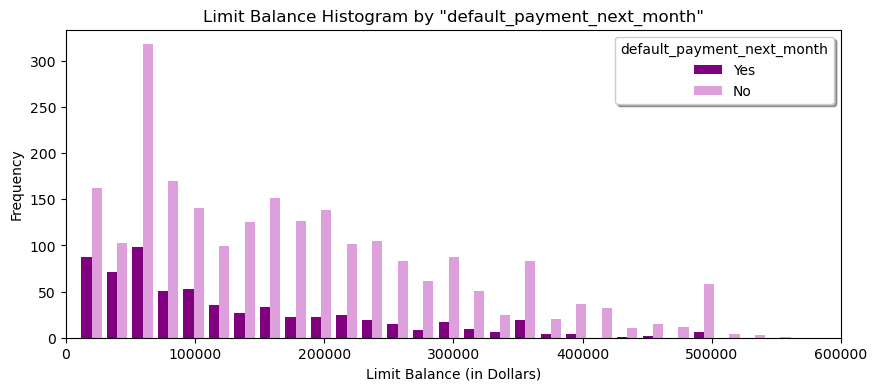

In [13]:
# Create a plot to see the distribution:
i = list(df[df['default_payment_next_month'] == 1]['limit_balance'])
j = list(df[df['default_payment_next_month'] == 0]['limit_balance'])

plt.figure(figsize=(10,4))
plt.hist([i, j], bins = 40, color=['purple', 'plum'])
plt.xlim([0,600000])
plt.legend(['Yes', 'No'], title = 'default_payment_next_month', loc='upper right', facecolor='white', shadow=True)
plt.xlabel('Limit Balance (in Dollars)')
plt.ylabel('Frequency')
plt.title('Limit Balance Histogram by "default_payment_next_month"')
plt.show();

***Insight:***

*From the histogram above it can be seen that there tend to be more defaulters in clients with a balance limit of $200,000 and below.*

### **6. AGE X DEFAULT PAYMENT : DISTRIBUTION CHECK**

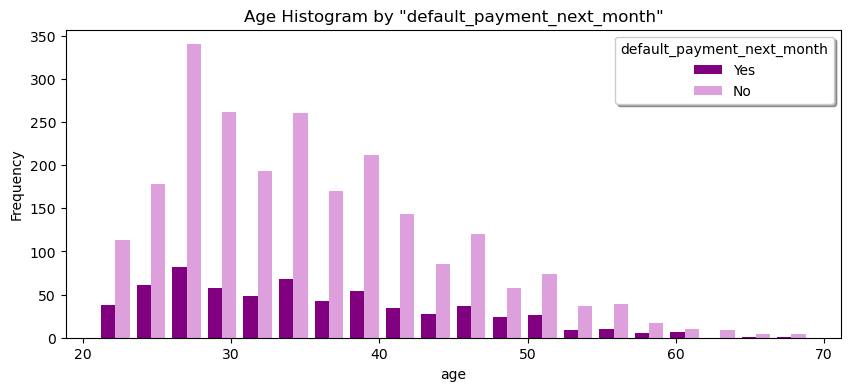

In [14]:
# Membuat plot untuk melihat distribusi:
u = list(df[df['default_payment_next_month'] == 1]['age'])
v = list(df[df['default_payment_next_month'] == 0]['age'])

plt.figure(figsize=(10,4))
plt.hist([u, v], bins = 20, color=['purple', 'plum'])
plt.legend(['Yes', 'No'], title = 'default_payment_next_month', loc='upper right', facecolor='white', shadow=True)
plt.xlabel('age')
plt.ylabel('Frequency')
plt.title('Age Histogram by "default_payment_next_month"')
plt.show();

***Insight:***

*From the histogram above it can be seen that defaulters tend to be more numerous in clients aged between 25-50 years.*

### **7. SEX X DEFAULT PAYMENT : DISTRIBUTION CHECK**

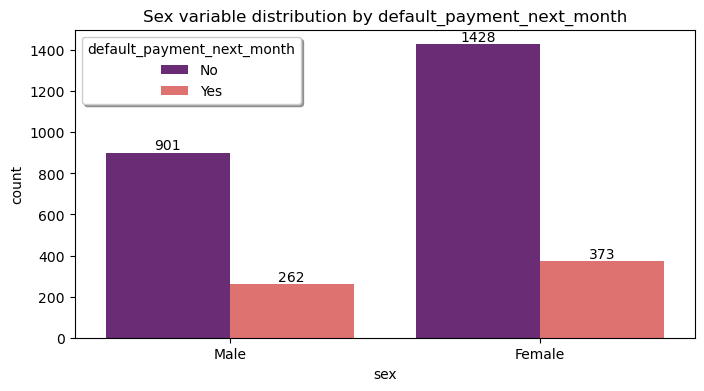

In [15]:
# Membuat plot untuk melihat distribusi:
plt.figure(figsize=(8,4))

ax=sns.countplot(data=df, x="sex", hue="default_payment_next_month", palette="magma")
for label in ax.containers:
    ax.bar_label(label)
plt.xticks([0,1], labels=["Male", "Female"])
plt.title("Sex variable distribution by default_payment_next_month")
plt.legend(['No', 'Yes'], title = 'default_payment_next_month', loc='upper left', facecolor='white', shadow=True)
plt.show()

***Insight:***

*From the histogram above, it can be seen that the number of clients is more female and defaulters tend to be more female clients than male clients.*

### **8. EDUCATION LEVEL X DEFAULT PAYMENT : DISTRIBUTION CHECK**

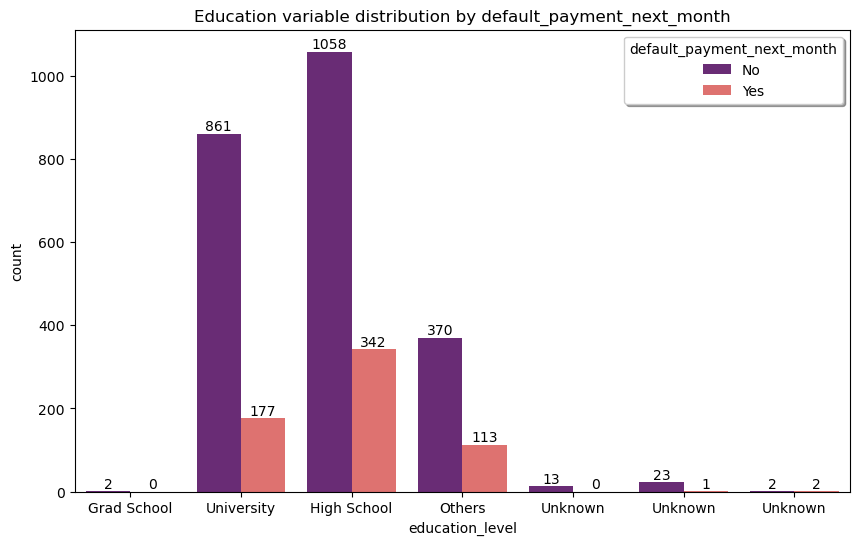

In [16]:
# Membuat plot untuk melihat distribusi:
plt.figure(figsize=(10,6))

ax=sns.countplot(data=df, x="education_level", hue="default_payment_next_month", palette="magma")
for label in ax.containers:
    ax.bar_label(label)
plt.xticks([0,1,2,3,4,5,6], labels=["Grad School", "University", "High School", "Others", "Unknown", "Unknown", "Unknown"])
plt.title("Education variable distribution by default_payment_next_month")
plt.legend(['No', 'Yes'], title = 'default_payment_next_month', loc='upper right', facecolor='white', shadow=True)
plt.show()

***Insight:***

*From the histogram above, it can be seen that the greater number of clients come from university graduates and the least number of clients have no education or school. And defaulters mostly occur among university graduates. The Unknown category can later be handled by combining it with Others.*

### **9. MARITAL STATUS X DEFAULT PAYMENT : DISTRIBUTION CHECK**

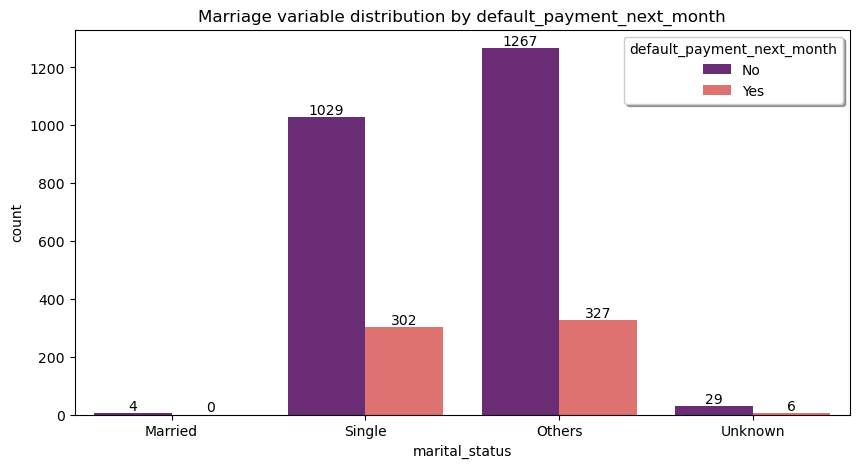

In [17]:
# Membuat plot untuk melihat distribusi:
plt.figure(figsize=(10,5))

ax=sns.countplot(data=df, x="marital_status", hue="default_payment_next_month", palette="magma")
for label in ax.containers:
    ax.bar_label(label)
plt.xticks([0,1,2,3], labels=["Married", "Single", "Others", "Unknown"])
plt.title("Marriage variable distribution by default_payment_next_month")
plt.legend(['No', 'Yes'], title = 'default_payment_next_month', loc='upper right', facecolor='white', shadow=True)
plt.show()

***Insight:***

*From the histogram above, it can be seen that the number of clients with single and other status is greater. And defaulters also tend to be more numerous among clients who are single and others. Unknown will also be handled by combining it with Others.*

### **10. NUMERICAL COLUMNS : NORMAL DISTRIBUTION CHECK**

Here I will look at the distribution or spread of data from each numerical column, so that I can find out whether the data type is normally distributed or not.

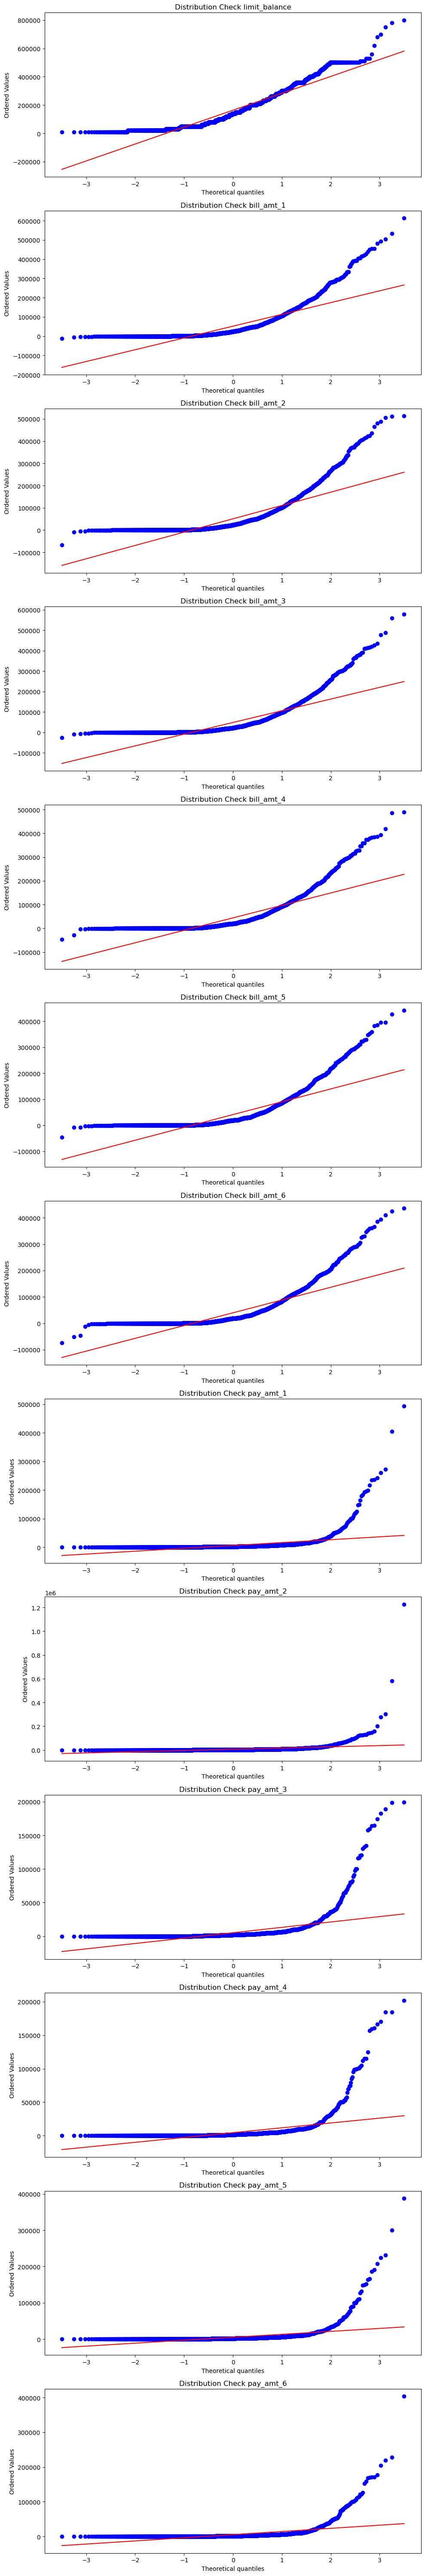

In [18]:
# Kolom-kolom yang ingin divisualisasikan
num_cols = [
    'limit_balance', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6',
       'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6'
]

# Membuat subplot
fig, axes = plt.subplots(nrows=len(num_cols), ncols=1, figsize=(10, 60))

# Visualisasi QQ plot untuk setiap kolom
for i, column in enumerate(num_cols):
    ax = axes[i]
    stats.probplot(df[column], dist="norm", plot=ax)
    ax.set_title(f"Distribution Check {column}")

plt.tight_layout()
plt.show()

***Insight:***

*In general, the data from the numerical feature columns is not normally distributed.*

### **11. CORRELATION CHECK**

In determining the feature column that will be used to predict the target column later, here you will see the correlation value for each column.

<Axes: >

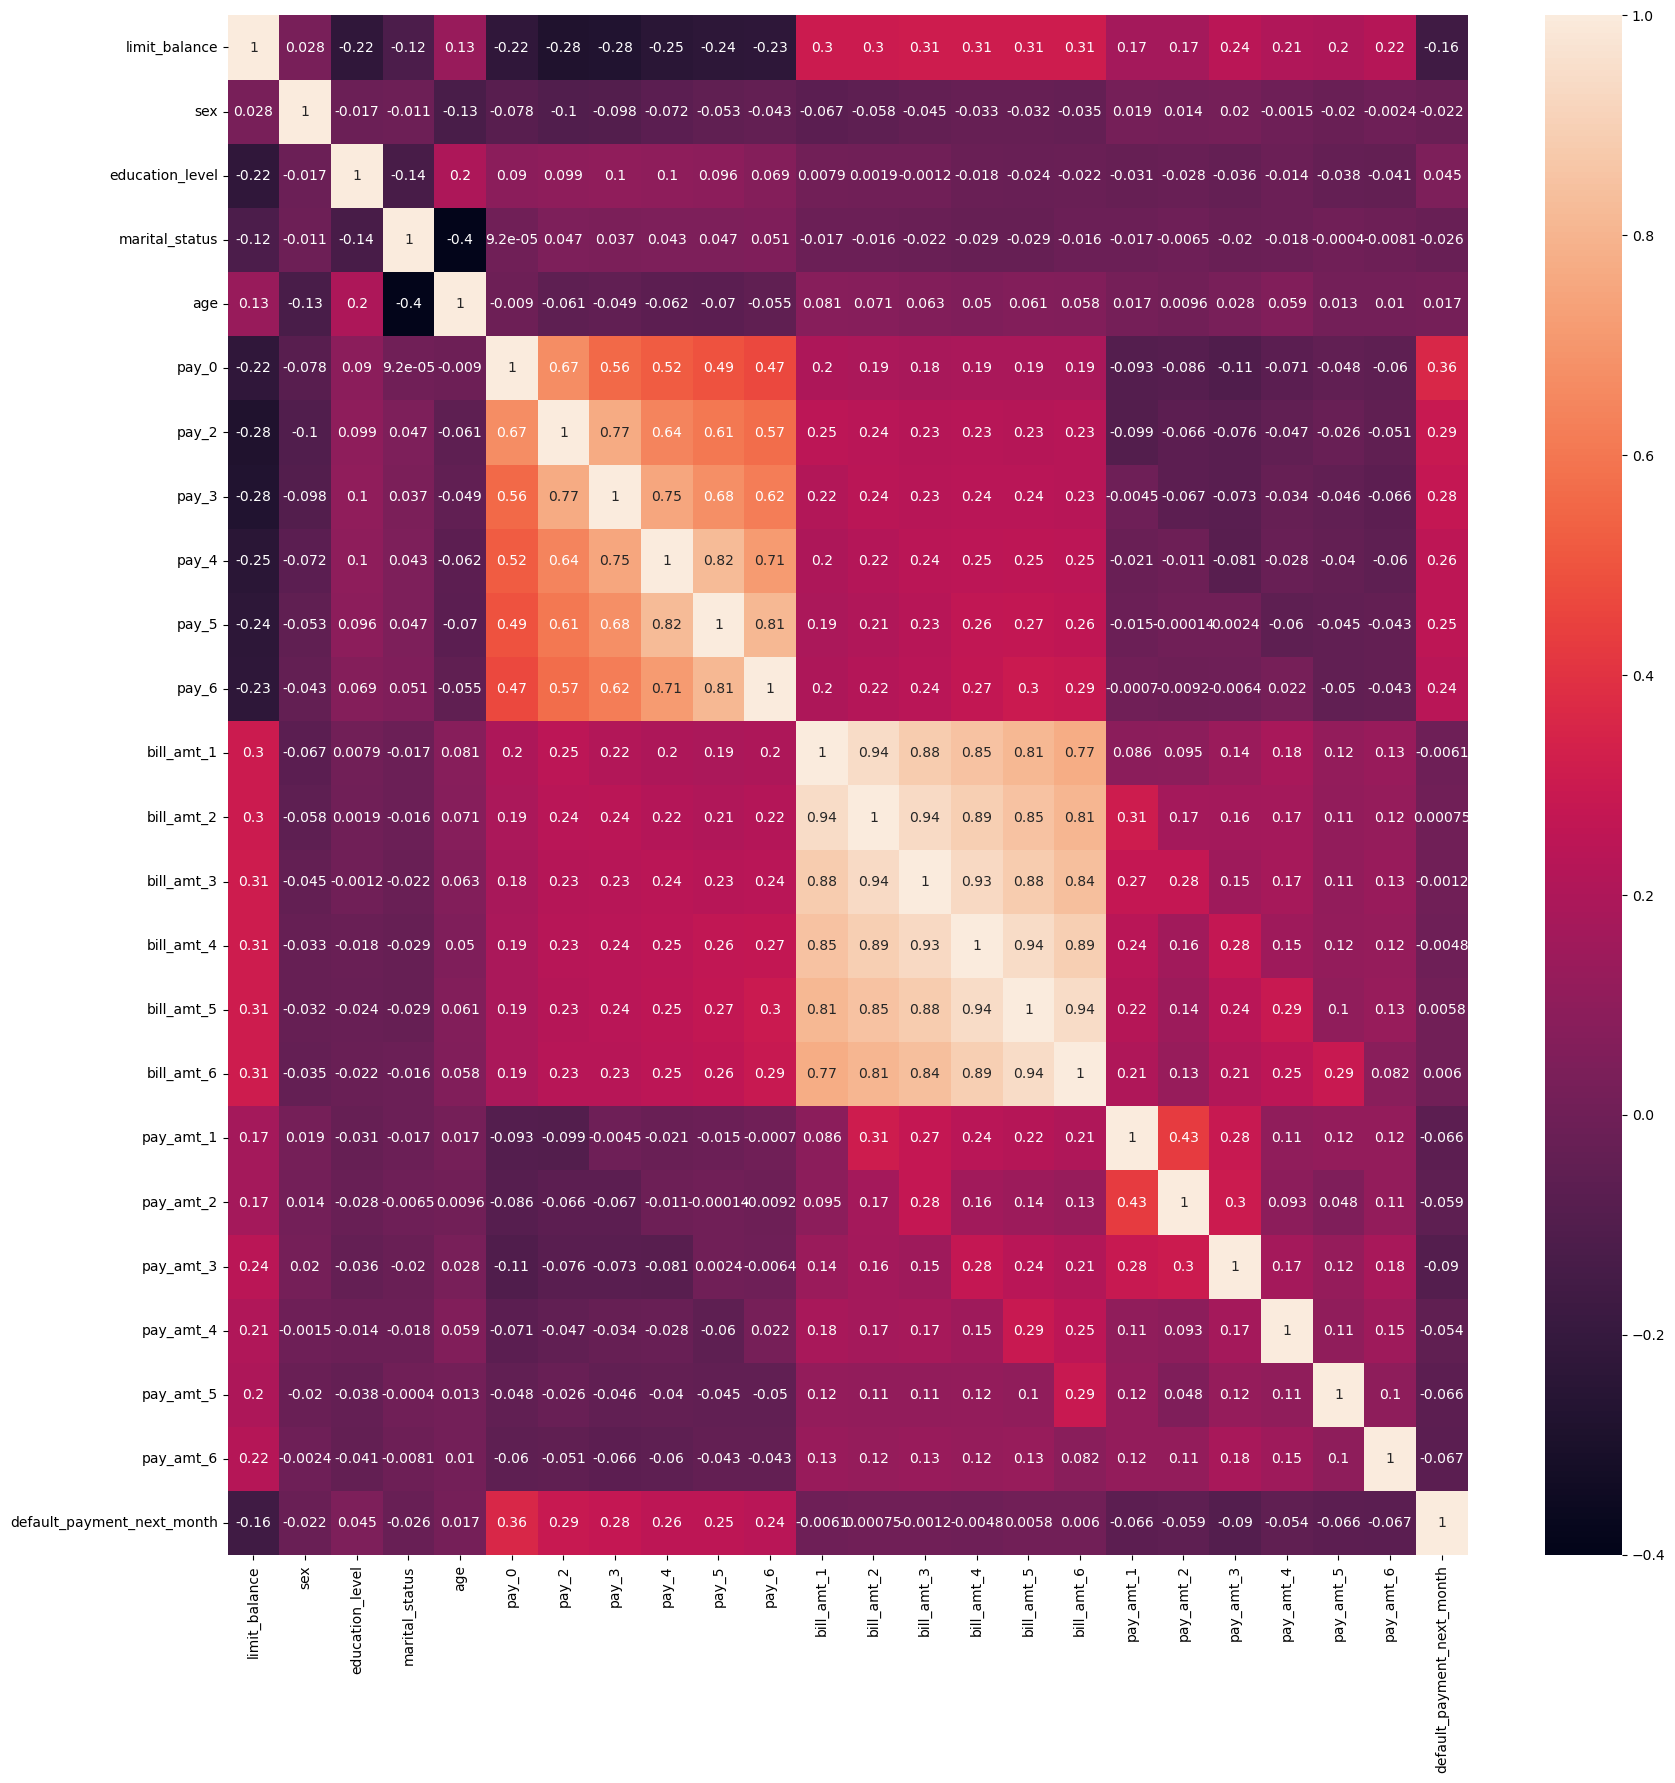

In [19]:
# Melihat korelasi dengan metode pearson:
CorrMat = df.corr()
plt.figure(figsize = (20,20))
sns.heatmap(CorrMat, annot=True)

In [20]:
# Correlation for response variable dafault_pay:

corr_def_pay = CorrMat["default_payment_next_month"].sort_values(ascending=False)
print(corr_def_pay.to_string())

default_payment_next_month    1.000000
pay_0                         0.357185
pay_2                         0.288669
pay_3                         0.275608
pay_4                         0.255648
pay_5                         0.253161
pay_6                         0.237007
education_level               0.044745
age                           0.016883
bill_amt_6                    0.005994
bill_amt_5                    0.005807
bill_amt_2                    0.000751
bill_amt_3                   -0.001200
bill_amt_4                   -0.004844
bill_amt_1                   -0.006089
sex                          -0.021626
marital_status               -0.026193
pay_amt_4                    -0.053748
pay_amt_2                    -0.059307
pay_amt_5                    -0.066214
pay_amt_1                    -0.066221
pay_amt_6                    -0.067025
pay_amt_3                    -0.090318
limit_balance                -0.161868


***Insight:***

*From the results of checking the correlation above, it can be seen that the target default payment next month feature has a high correlation value with pay_0 - pay_6 and also with the balance limit (needs further analysis).*

---

# **VI. FEATURE ENGINEERING**

After carrying out a more in-depth analysis of the data, feature engineering will now be carried out on the data.

### **1. DATA SPLIT (TRAIN & TEST)**

After completing the analysis of the data, the data will then be divided into 80% for model training data and 20% for model test data. This is done so that the model is able to learn from training data and make predictions from test data later.

Because from the results of the previous analysis it is known that the target column that will be predicted by the model is 'default_payment_next_month', then this column will be used as variable 'y', and columns other than that will be used as feature columns in variable 'X' for now.

In [21]:
# Split kolom fitur dan target menjadi X dan y:
X = df.drop('default_payment_next_month', axis=1)
y = df['default_payment_next_month']

# Memisahkan data untuk train dan test:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.2, random_state=5)

# Melihat pembagian data train dan test:
print('X_train Shape: ' ,X_train.shape)
print('X_test Shape: ' ,X_test.shape)
print('y_train Shape: ' ,y_train.shape)
print('y_train Shape' ,y_test.shape)

X_train Shape:  (2371, 23)
X_test Shape:  (593, 23)
y_train Shape:  (2371,)
y_train Shape (593,)


***Insight:*** 

*From the results above, it shows that the data has been successfully split into Train and Test, along with the number of entries and columns.*

### **2. DATA CLEANING**

At this stage I will do preprocessing on the data/data cleaning. From the previous EDA results it can be seen that column names can still be tidied up to make the project easier, and cardinality can also be handled. The columns to be renamed are:

**pay_0 - pay_6, bill_amt_1 - bill_amt_6, pay_amt_1 - pay_amt_6, default_payment_next_month**:

*Because the column shows the month, I will rename it to the name of the month for each column.*

For cardinality, what I will handle is the column:

**Education Level**: (1: graduate school, 2: university, 3: high school, 4: others)

*Because there are unknown values such as 0, 5, and 6. I will combine these values later into value 4, which means 'others'.*

**Marital Status**: (1: married, 2: single, 3: others)

*Because there is an unknown value 0, I will combine this value into value 3 which means 'others'.*

**pay_0 - pay_6**:

*For this column, I will also combine the values in it and arrange them in order from 0-6.*

In [22]:
# Membuat fungsi:
def preprocess_data(X_train, X_test, y_train, y_test):
    # Mengubah nama kolom fitur:
    columns_mapping = {
        'pay_0':'pay_sept', 'pay_2':'pay_aug', 'pay_3':'pay_jul', 'pay_4':'pay_jun', 'pay_5':'pay_may','pay_6':'pay_apr',
        'bill_amt_1':'bill_amt_sept', 'bill_amt_2':'bill_amt_aug', 'bill_amt_3':'bill_amt_jul', 'bill_amt_4':'bill_amt_jun', 
        'bill_amt_5':'bill_amt_may', 'bill_amt_6':'bill_amt_apr', 'pay_amt_1':'pay_amt_sept', 'pay_amt_2':'pay_amt_aug', 
        'pay_amt_3':'pay_amt_jul', 'pay_amt_4':'pay_amt_jun', 'pay_amt_5':'pay_amt_may', 'pay_amt_6':'pay_amt_apr'
    }

    X_train.rename(columns=columns_mapping, inplace=True)
    X_test.rename(columns=columns_mapping, inplace=True)

    # Mengubah nama kolom target:
    y_train = y_train.rename('default')
    y_test = y_test.rename('default')

    # Mengubah nilai-nilai di kolom Education Level:
    def map_education_level(x):
        return 4 if x in [0, 5, 6] else x

    X_train['education_level'] = X_train['education_level'].apply(map_education_level)
    X_test['education_level'] = X_test['education_level'].apply(map_education_level)

    # Mengubah nilai-nilai di kolom Marital Status:
    def map_marital_status(x):
        return 3 if x == 0 else x

    X_train['marital_status'] = X_train['marital_status'].apply(map_marital_status)
    X_test['marital_status'] = X_test['marital_status'].apply(map_marital_status)

    # Menyatukan nilai -2, -1, dan 0 di kolom pay:
    for col in ['pay_sept', 'pay_aug', 'pay_jul', 'pay_jun', 'pay_may', 'pay_apr']:
        X_train.loc[(X_train[col] == -2) | (X_train[col] == -1) | (X_train[col] == 0), col] = 0
        X_test.loc[(X_test[col] == -2) | (X_test[col] == -1) | (X_test[col] == 0), col] = 0

    return X_train, X_test, y_train, y_test

# Menerapkan fungsi ke data train dan test:
X_train, X_test, y_train, y_test = preprocess_data(X_train, X_test, y_train, y_test)

See changes in column names that have been renamed.

In [23]:
# Melihat perubahan setelah direname:
X_train.head(3)

,limit_balance,sex,education_level,marital_status,age,pay_sept,pay_aug,pay_jul,pay_jun,pay_may,...,bill_amt_jul,bill_amt_jun,bill_amt_may,bill_amt_apr,pay_amt_sept,pay_amt_aug,pay_amt_jul,pay_amt_jun,pay_amt_may,pay_amt_apr
2861,210000.0,2,2,2,41.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,8333.0,0.0,0.0,0.0,0.0,0.0
207,310000.0,2,1,2,26.0,0.0,0.0,0.0,0.0,0.0,...,25223.0,25555.0,24311.0,17992.0,1393.0,1596.0,1447.0,93.0,118.0,56.0
2925,360000.0,1,1,2,39.0,0.0,0.0,0.0,0.0,0.0,...,3740.0,0.0,0.0,0.0,1448.0,3740.0,0.0,0.0,0.0,3942.0


In [24]:
# Melihat perubahan setelah direname:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 2371 entries, 2861 to 2916
Series name: default
Non-Null Count  Dtype
--------------  -----
2371 non-null   int64
dtypes: int64(1)
memory usage: 37.0 KB


In [25]:
# Mengecek unique values:
X_train['education_level'].value_counts()

2    1112
1     837
3     393
4      29
Name: education_level, dtype: int64

In [26]:
# Mengecek unique values:
X_train['marital_status'].value_counts()

2    1277
1    1059
3      35
Name: marital_status, dtype: int64

In [27]:
X_train['pay_sept'].value_counts()

0.0    1848
1.0     280
2.0     209
3.0      22
4.0       6
8.0       2
7.0       2
5.0       2
Name: pay_sept, dtype: int64

***Insight:***

*From the 3 results above, it can be seen that the values in the data have been successfully combined into each value. This means that the cardinality has been successfully handled.*

### **3. ENCODING**

At this encoding stage, I use the One Hot Encoder method because the categorical columns are nominal only.

In [28]:
# Mendefine kolom fitur yang berjenis kategorikal:
cat_ohe = ['sex', 'education_level', 'marital_status']

# Mentransformasi dalam bentuk array:
enc_ohe = OneHotEncoder(sparse=False)

# Menggunakan metode fit sebelum melakukan transformasi:
enc_ohe.fit(X_train[cat_ohe])

# Mengubah nilai-nilai kategorikal menjadi representasi biner:
# Hasil transformasi dari data train dan data test disimpan ke variable: 
X_train_ohe = enc_ohe.transform(X_train[cat_ohe])
X_test_ohe = enc_ohe.transform(X_test[cat_ohe])

# Mendapatkan daftar nama fitur dan mendefinenya ke variable:
feature_names = enc_ohe.get_feature_names_out(input_features= cat_ohe)

# Mendefine dataframe baru sesuai encoding sebelumnya:
X_train_ohe = pd.DataFrame(X_train_ohe, columns=feature_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=feature_names)

# Menyamakan index sebelum melakukan join:
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

# Menghapus kolom awal yang unique valuenya sudah diencoding:
X_train_new = pd.concat([X_train, X_train_ohe], axis=1)
X_train_new.drop(columns=['sex', 'education_level', 'marital_status'], inplace=True)
X_test_new = pd.concat([X_test, X_test_ohe], axis=1)
X_test_new.drop(columns=['sex', 'education_level', 'marital_status'], inplace=True)
                            
# Mengecek perubahan:
X_train_new.head(2)

,limit_balance,age,pay_sept,pay_aug,pay_jul,pay_jun,pay_may,pay_apr,bill_amt_sept,bill_amt_aug,...,pay_amt_apr,sex_1,sex_2,education_level_1,education_level_2,education_level_3,education_level_4,marital_status_1,marital_status_2,marital_status_3
0,210000.0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8333.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,310000.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,27638.0,24020.0,...,56.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


*From the output results above, it can be seen that the categorical columns have been successfully encoded properly.*

### **4. SCALING**

At this scaling stage, I used the Min Max Scaler method because the distribution of data from the numerical columns was detected to be abnormal.

In [29]:
# Mendefine kolom numerical yang mau discaling:
num_features = ['age', 'limit_balance', 'bill_amt_sept', 'bill_amt_aug', 'bill_amt_jul', 'bill_amt_jun', 'bill_amt_may',
                'bill_amt_apr', 'pay_amt_sept', 'pay_amt_aug', 'pay_amt_jul', 'pay_amt_jun', 'pay_amt_may', 'pay_amt_apr']

# Mendefine MinMaxScaler:
mm_scaler = MinMaxScaler()

# Menerapkan scaling kemudian fit dan transform:
mm_scaler.fit(X_train_new[num_features])
X_train_new[num_features] = mm_scaler.transform(X_train_new[num_features])
X_test_new[num_features] = mm_scaler.transform(X_test_new[num_features])

# Melihat perubahan data
X_train_new.head()

,limit_balance,age,pay_sept,pay_aug,pay_jul,pay_jun,pay_may,pay_apr,bill_amt_sept,bill_amt_aug,...,pay_amt_apr,sex_1,sex_2,education_level_1,education_level_2,education_level_3,education_level_4,marital_status_1,marital_status_2,marital_status_3
0,0.253165,0.416667,0.0,0.0,0.0,0.0,0.0,0.0,0.018460,0.024960,...,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.379747,0.104167,0.0,0.0,0.0,0.0,0.0,0.0,0.062652,0.055289,...,0.000245,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.443038,0.375000,0.0,0.0,0.0,0.0,0.0,0.0,0.022870,0.011649,...,0.017267,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.607595,0.312500,0.0,0.0,0.0,0.0,0.0,0.0,0.021476,0.027108,...,0.022479,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.050633,0.916667,0.0,0.0,0.0,0.0,0.0,0.0,0.095756,0.100617,...,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


*From the output results above it can be seen that the numerical columns have been successfully scaled well.*

### **5. FEATURE SELECTION**

After completing the encoding and scaling process, the next stage is to determine which feature columns will be used to predict the default by carrying out the feature selection process.

#### **5A. MODELS PREDICT ON ALL FEATURES**

Make model predictions on data that has not yet been feature selected.

In [30]:
# Inisialisasi model:
logreg = LogisticRegression()
svc = SVC()
knn = KNeighborsClassifier()

# Melatih model dengan seluruh features:
logreg.fit(X_train_new, y_train)
svc.fit(X_train_new, y_train)
knn.fit(X_train_new, y_train)

# Membuat prediksi:
pred_logreg = logreg.predict(X_test_new)
pred_svc = svc.predict(X_test_new)
pred_knn = knn.predict(X_test_new)

# Evaluasi menggunakan F1 Score:
f1_score_logreg = round(f1_score(y_test, pred_logreg), 3)
f1_score_svc = round(f1_score(y_test, pred_svc), 3)
f1_score_knn = round(f1_score(y_test, pred_knn), 3)

print("F1 Score of Logistic Regression:", f1_score_logreg)
print("F1 Score of Support Vector Machine Classifier:", f1_score_svc)
print("F1 Score of K Nearest Neighbors:", f1_score_knn)

F1 Score of Logistic Regression: 0.5
F1 Score of Support Vector Machine Classifier: 0.519
F1 Score of K Nearest Neighbors: 0.493


*You can see the value of each F1 Score on the 3 models. So far, the strongest prediction score is the SVM Classifier model.*

#### **5B. VARIANCE THRESHOLD - FEATURES SELECTION**

Perform feature selection using the Variance Threshold method, and see changes in scores from the prediction results.

In [31]:
# Membuat salinan dari data sesudah di enc:
X_train_v1, X_test_v1, y_train_v1, y_test_v1 = X_train_new.copy(), X_test_new.copy(), y_train.copy(), y_test.copy()

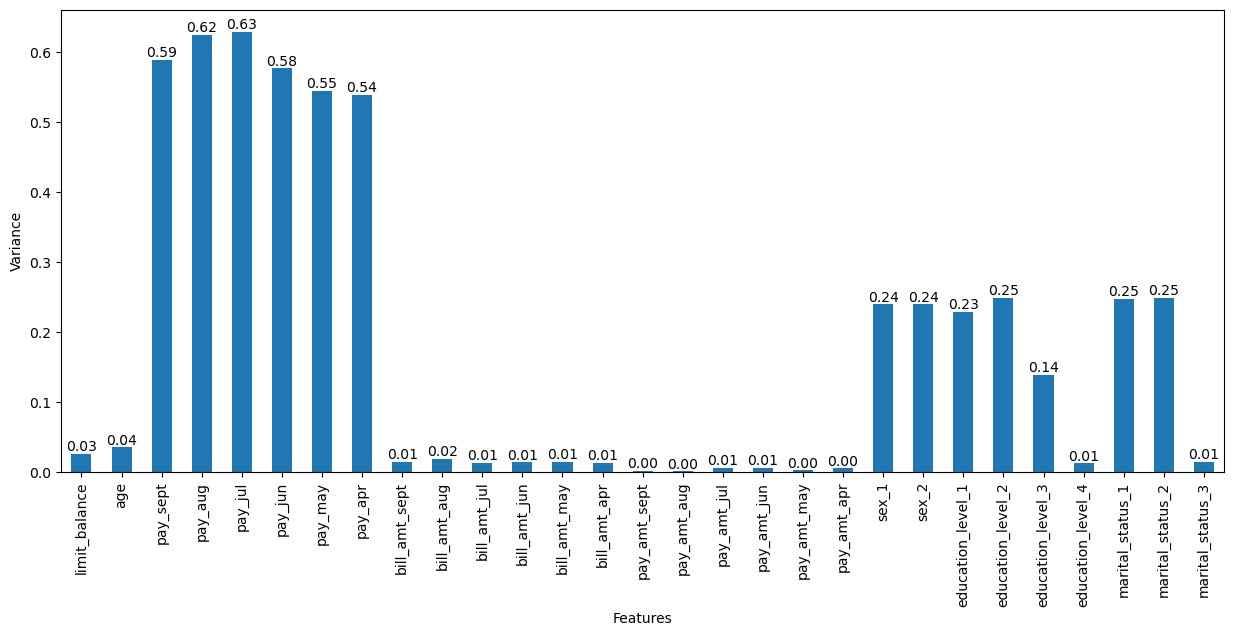

In [32]:
# Menghitung variance untuk setiap kolom fitur:
variance_per_feature = X_train_v1.var(axis=0)

# Membuat plot:
fig, ax = plt.subplots(figsize=(15, 6))
variance_per_feature.plot(kind='bar', ax=ax)
ax.set_xlabel('Features')
ax.set_ylabel('Variance')

# Menambahkan nilai variance pada plot:
for index, value in enumerate(variance_per_feature):
    ax.text(index, value, f'{value:.2f}', ha='center', va='bottom')

plt.show()

*From the results above, I decided to use pay_sept - pay_apr, because the variance value exceeds 0.5.*

In [33]:
# Menghapus kolom-kolom fitur yang tidak digunakan:
sel_X_train_v1 = X_train_v1.drop(['limit_balance', 'age', 'bill_amt_sept', 'bill_amt_aug', 'bill_amt_jul', 'bill_amt_jun',
                                    'bill_amt_may', 'bill_amt_apr', 'pay_amt_sept', 'pay_amt_aug', 'pay_amt_jul',
                                    'pay_amt_jun', 'pay_amt_may', 'pay_amt_apr', 'sex_1', 'sex_2', 'education_level_1',
                                    'education_level_2', 'education_level_3', 'education_level_4', 'marital_status_1',
                                    'marital_status_2', 'marital_status_3'], axis=1)

sel_X_test_v1 = X_test_v1.drop(['limit_balance', 'age', 'bill_amt_sept', 'bill_amt_aug', 'bill_amt_jul', 'bill_amt_jun',
                                    'bill_amt_may', 'bill_amt_apr', 'pay_amt_sept', 'pay_amt_aug', 'pay_amt_jul',
                                    'pay_amt_jun', 'pay_amt_may', 'pay_amt_apr', 'sex_1', 'sex_2', 'education_level_1',
                                    'education_level_2', 'education_level_3', 'education_level_4', 'marital_status_1',
                                    'marital_status_2', 'marital_status_3'], axis=1)

# Melakukan training terhadap model dengan fitur yang sudah ditentukan:
logreg.fit(sel_X_train_v1, y_train_v1)
svc.fit(sel_X_train_v1, y_train_v1)
knn.fit(sel_X_train_v1, y_train_v1)

# Melakukan prediksi terhadap model:
var_preds_logreg = logreg.predict(sel_X_test_v1)
var_preds_svc = svc.predict(sel_X_test_v1)
var_preds_knn = knn.predict(sel_X_test_v1)

# Melihat skor prediksi:
f1_score_var_preds_logreg = round(f1_score(y_test_v1, var_preds_logreg, average='weighted'), 3)
f1_score_var_preds_svc = round(f1_score(y_test_v1, var_preds_svc, average='weighted'), 3)
f1_score_var_preds_knn = round(f1_score(y_test_v1, var_preds_knn, average='weighted'), 3)

# Mencetak hasil prediksi:
print("F1 Score of Logistic Regression after Variance Feature Selection:", f1_score_var_preds_logreg)
print("F1 Score of Support Vector Machine Classifier after Variance Feature Selection:", f1_score_var_preds_svc)
print("F1 Score of K Nearest Neighbors after Variance Feature Selection:", f1_score_var_preds_knn)

F1 Score of Logistic Regression after Variance Feature Selection: 0.798
F1 Score of Support Vector Machine Classifier after Variance Feature Selection: 0.805
F1 Score of K Nearest Neighbors after Variance Feature Selection: 0.771


*You can see, after performing feature selection using the Variance Threshold method, the F1 Score obtained is better. From the previous SVM Classifier value of 0.519, now it has increased significantly to 0.805. The Logistic Regression and KNN models also experienced a good increase in scores.*

#### **5C. SELECTKBEST - FEATURES SELECTION**

Perform feature selection using the SelectKBest method, and see changes in scores from the prediction results.

In [34]:
# Membuat salinan dari data sesudah di enc:
X_train_v2, X_test_v2, y_train_v2, y_test_v2 = X_train_new.copy(), X_test_new.copy(), y_train.copy(), y_test.copy()

In [35]:
# Membuat variable untuk menyimpan hasil:
f1_score_list_logreg = []
f1_score_list_svc = []
f1_score_list_knn = []

# Fungsi looping untuk mencari perbedaan antara fitur yang dipakai:
for k in range(1, 29):
    selector = SelectKBest(mutual_info_classif, k=k)
    selector.fit(X_train_v2, y_train_v2)
    sel_X_train_v2 = selector.transform(X_train_v2)
    sel_X_test_v2 = selector.transform(X_test_v2)

    # Melatih model:
    logreg.fit(sel_X_train_v2, y_train_v2)
    svc.fit(sel_X_train_v2, y_train_v2)
    knn.fit(sel_X_train_v2, y_train_v2)

    # Memprediksi model:
    kbest_preds_logreg = logreg.predict(sel_X_test_v2)
    kbest_preds_svc = svc.predict(sel_X_test_v2)
    kbest_preds_knn = knn.predict(sel_X_test_v2)
    
    # Melihat skor evaluasi model:
    f1_score_kbest_logreg = round(f1_score(y_test_v2, kbest_preds_logreg, average='weighted'), 3)
    f1_score_kbest_svc = round(f1_score(y_test_v2, kbest_preds_svc, average='weighted'), 3)
    f1_score_kbest_knn = round(f1_score(y_test_v2, kbest_preds_knn, average='weighted'), 3)
    
    # Mengambil fitur terbaik dan ditambahkan ke variable yang sudah dibuat sebelumnya:
    f1_score_list_logreg.append(f1_score_kbest_logreg)
    f1_score_list_svc.append(f1_score_kbest_svc)
    f1_score_list_knn.append(f1_score_kbest_knn)

See the results of the Logistic Regression model.

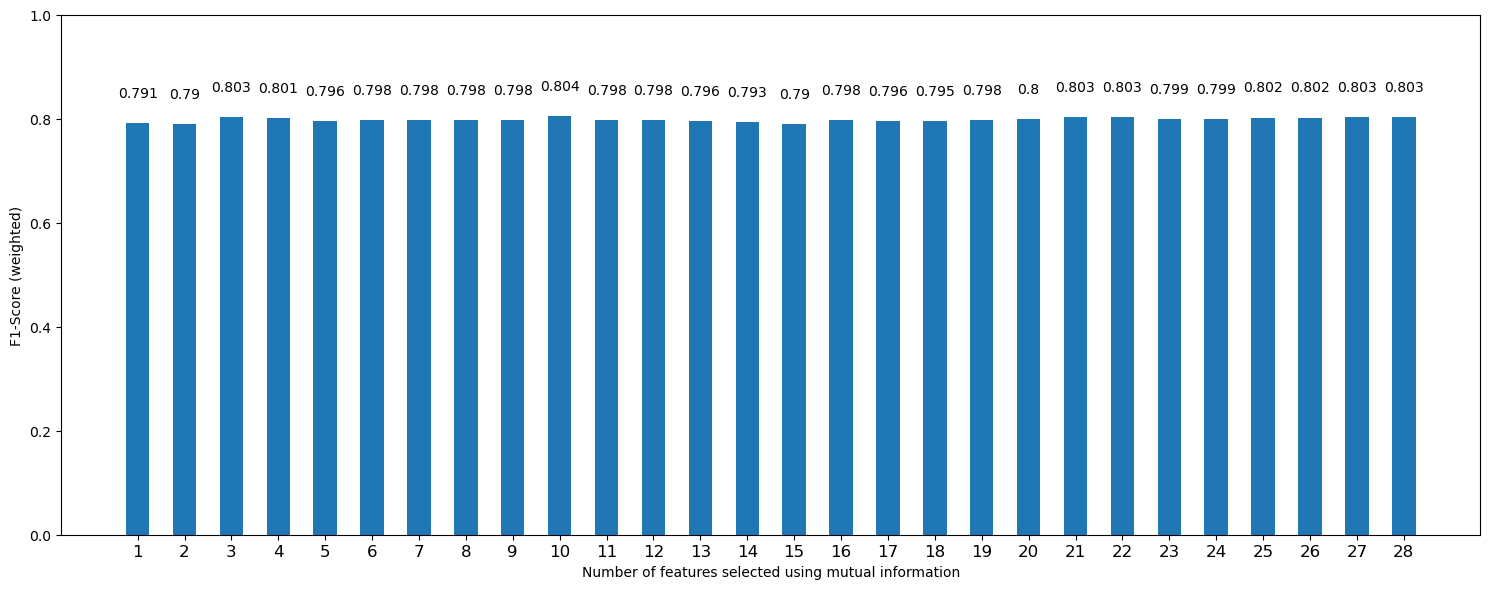

In [36]:
# Membuat plot:
fig, ax = plt.subplots(figsize=(15,6))
x = np.arange(1, 29)
y = f1_score_list_logreg
ax.bar(x, y, width=0.5)
ax.set_xlabel('Number of features selected using mutual information')
ax.set_ylabel('F1-Score (weighted)')
ax.set_ylim(0, 1)
ax.set_xticks(np.arange(1, 29))
ax.set_xticklabels(np.arange(1, 29), fontsize=12)

# Menampilkan nilai pada bar:
for i, v in enumerate(y):
    plt.text(x=i+1, y=v+0.05, s=str(v), ha='center')

# Melihat plot:
plt.tight_layout()

*From the results above it can be seen that no matter how many features are used, the score obtained by the model can be concluded to be the same.*

See the results of the SVM Classifier model.

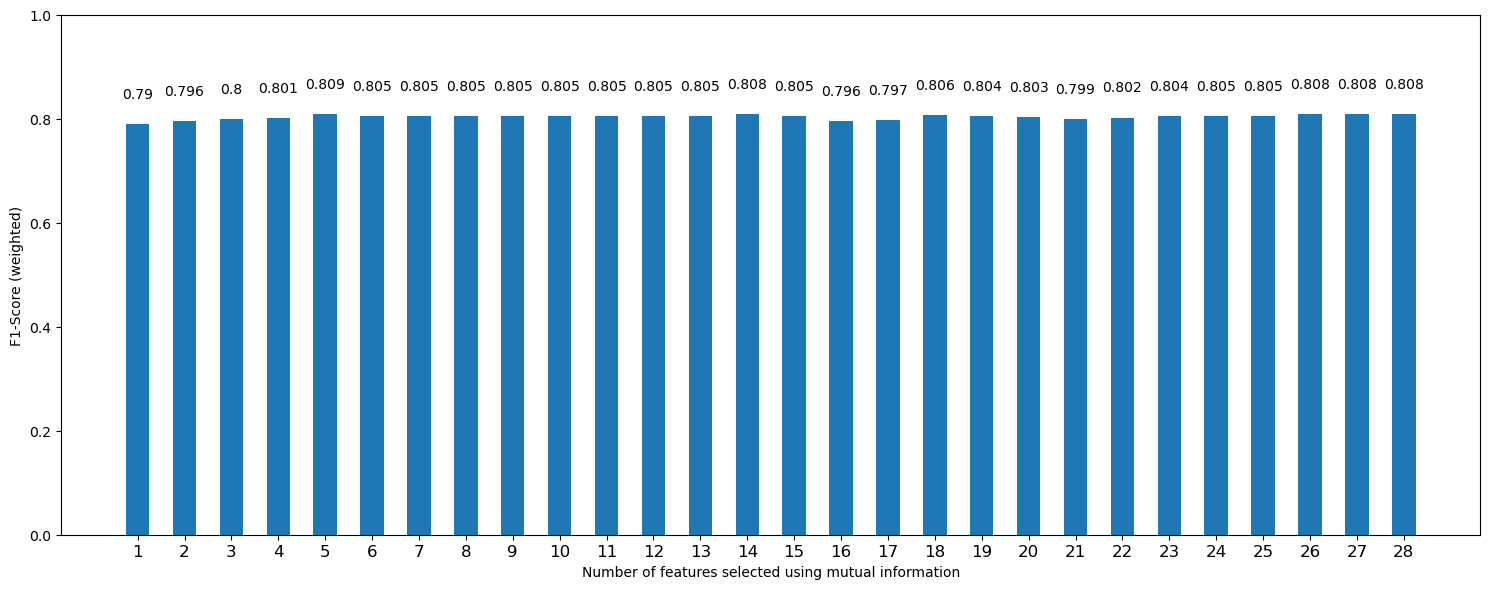

In [37]:
# Membuat plot:
fig, ax = plt.subplots(figsize=(15,6))
x = np.arange(1, 29)
y = f1_score_list_svc
ax.bar(x, y, width=0.5)
ax.set_xlabel('Number of features selected using mutual information')
ax.set_ylabel('F1-Score (weighted)')
ax.set_ylim(0, 1)
ax.set_xticks(np.arange(1, 29))
ax.set_xticklabels(np.arange(1, 29), fontsize=12)

# Menampilkan nilai pada bar:
for i, v in enumerate(y):
    plt.text(x=i+1, y=v+0.05, s=str(v), ha='center')

# Melihat plot:
plt.tight_layout()

*From the results above it can be seen that no matter how many features are used, the score obtained by the model can be concluded to be the same.*

Looking at the results of the K Nearest Neighbors model.

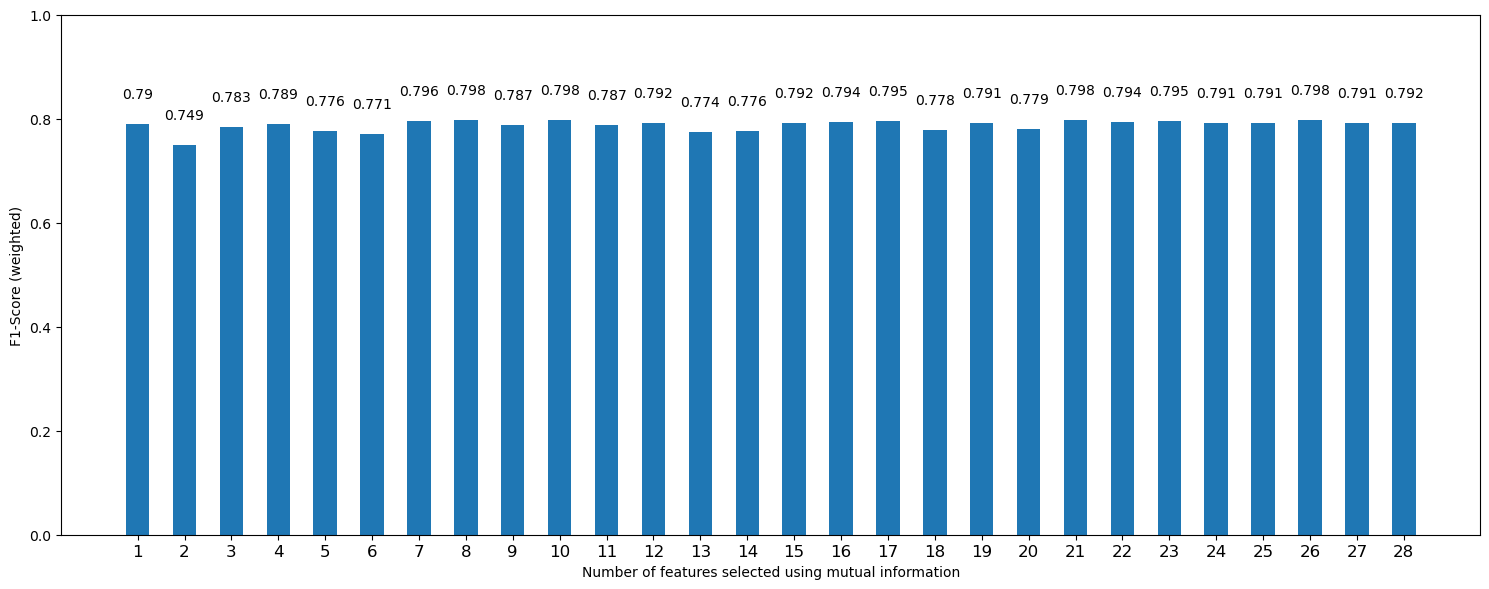

In [38]:
# Membuat plot:
fig, ax = plt.subplots(figsize=(15,6))
x = np.arange(1, 29)
y = f1_score_list_knn
ax.bar(x, y, width=0.5)
ax.set_xlabel('Number of features selected using mutual information')
ax.set_ylabel('F1-Score (weighted)')
ax.set_ylim(0, 1)
ax.set_xticks(np.arange(1, 29))
ax.set_xticklabels(np.arange(1, 29), fontsize=12)

# Menampilkan nilai pada bar:
for i, v in enumerate(y):
    plt.text(x=i+1, y=v+0.05, s=str(v), ha='center')

# Melihat plot:
plt.tight_layout()

*From the results above it can be seen that no matter how many features are used, the score obtained by the model can be concluded to be the same.*

In [39]:
# Mengambil hanya 6 kolom yang terbaik menurut SelectKBest:
selector = SelectKBest(mutual_info_classif, k=6)
selector.fit(X_train_v2, y_train_v2)
selected_feature_mask = selector.get_support()
selected_features = X_train_v2.columns[selected_feature_mask]

selected_features

Index(['pay_sept', 'pay_aug', 'pay_jul', 'pay_jun', 'pay_apr', 'pay_amt_sept'], dtype='object')

***Insight:***

*From the results of the feature selection experiment using the SelectKbest technique, it can be said that no matter the number of features, the F1 score results for the 3 models can be said to be the same.*

In [40]:
# Memilih kolom yang akan digunakan model based on SelectKBest:
selected_columns = ['pay_sept', 'pay_aug', 'pay_jul', 'pay_jun', 'pay_may', 'pay_apr']
X_train_selected = X_train_new[selected_columns]
X_test_selected = X_train_new[selected_columns]

# Melihat perubahan:
X_test_selected.head(3)

,pay_sept,pay_aug,pay_jul,pay_jun,pay_may,pay_apr
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0


*From the results of feature selection using the Variance Threshold and SelectKBest methods, I chose to use only 6 feature columns, namely: 'pay_sept', 'pay_aug', 'pay_jul', 'pay_jun', 'pay_may', 'pay_apr'.*

---

# **VII. HYPERPARAMETER TUNING**

In determining or getting the best hyperparameters from all the models that will be used, here I will carry out hyperparameter tuning using Grid Search CV.

### **1. MODEL DEFINITION**

Define the model to be used.

In [41]:
# Define model:
logreg = LogisticRegression()
svc = SVC()
knn = KNeighborsClassifier()

### **2. LOGISTIC REGRESSION**

In [42]:
# Mendefine parameter yang akan diuji coba oleh GridSearchCV:
param_grid = {'penalty':['l1','l2'], 'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [43]:
# Melakukan latihan terhadap data:
grid_logreg_clf = GridSearchCV(LogisticRegression(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_logreg_clf.fit(X_train_selected, y_train)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


[CV 2/3] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 3/3] END ..................C=0.01, penalty=l1;, score=nan total time=   0.0s
[CV 1/3] END ................C=0.01, penalty=l2;, score=0.818 total time=   0.0s
[CV 2/3] END ................C=0.01, penalty=l2;, score=0.829 total time=   0.0s
[CV 3/3] END ................C=0.01, penalty=l2;, score=0.833 total time=   0.0s
[CV 1/3] END ...................C=0.1, penalty=l1;, score=nan total time=   0.0s
[CV 2/3] END ...................C=0.1, penalty=l1;, score=nan total time=   0.0s
[CV 3/3] END ...................C=0.1, penalty=l1;, score=nan total time=   0.0s
[CV 1/3] END .................C=0.1, penalty=l2;, score=0.822 total time=   0.0s
[CV 1/3] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 2/3] END .................C=0.1, penalty=l2;, score=0.830 total time=   0.0s
[CV 3/3] END .................C=0.1, penalty=l2;, score=0.833 total time=   0.0s
[CV 2/3] END ...............

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=3)

In [44]:
# Melihat parameter terbaik:
grid_logreg_clf.best_params_

{'C': 1, 'penalty': 'l2'}

In [45]:
# Melihat skor:
grid_logreg_clf.best_score_

0.8388884443662085

*From the hyperparameter tuning process that has been carried out, it was found that the best hyperparameters are 'C': 1, 'penalty': 'l2'.*

### **3. SUPPORT VECTOR CLASSIFIER**

In [46]:
# Mendefine parameter yang akan diuji coba oleh GridSearchCV: 
param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['rbf']}

In [47]:
# Melakukan latihan terhadap data:
grid_svc_clf = GridSearchCV(SVC(probability=True), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_svc_clf.fit(X_train_selected, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[CV 1/3] END ...................C=1, kernel=rbf;, score=0.838 total time=   0.2s
[CV 1/3] END ..................C=10, kernel=rbf;, score=0.824 total time=   0.2s
[CV 1/3] END .................C=0.1, kernel=rbf;, score=0.814 total time=   0.3s
[CV 2/3] END ..................C=10, kernel=rbf;, score=0.851 total time=   0.2s
[CV 3/3] END ...................C=1, kernel=rbf;, score=0.830 total time=   0.2s
[CV 2/3] END .................C=0.1, kernel=rbf;, score=0.819 total time=   0.3s
[CV 2/3] END ...................C=1, kernel=rbf;, score=0.854 total time=   0.3s
[CV 3/3] END .................C=0.1, kernel=rbf;, score=0.814 total time=   0.3s
[CV 1/3] END .................C=100, kernel=rbf;, score=0.824 total time=   0.1s
[CV 3/3] END ..................C=10, kernel=rbf;, score=0.824 total time=   0.1s
[CV 2/3] END .................C=100, kernel=rbf;, score=0.849 total time=   0.1s
[CV 3/3] END .................C=100, kernel=rbf;, score=0.825 total time=   0.1s


GridSearchCV(cv=3, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'kernel': ['rbf']},
             scoring='accuracy', verbose=3)

In [48]:
# Melihat parameter terbaik:
grid_svc_clf.best_params_

{'C': 1, 'kernel': 'rbf'}

In [49]:
# Melihat skor:
grid_svc_clf.best_score_

0.8409965487259091

*From the hyperparameter tuning process that has been carried out, it was found that the best hyperparameters are 'C': 1, 'kernel': 'rbf'.*

### **4. K NEAREST NEIGHBORS**

In [50]:
# Mendefine parameter yang akan diuji coba oleh GridSearchCV:
param_grid = {'n_neighbors': [3, 5, 7, 9], 'metric': ['euclidean', 'manhattan', 'chebyshev']}

In [51]:
# Melakukan latihan terhadap data:
grid_knn_clf = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')
grid_knn_clf.fit(X_train_selected, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev'],
                         'n_neighbors': [3, 5, 7, 9]},
             scoring='accuracy')

In [52]:
# Melihat parameter terbaik:
grid_knn_clf.best_params_

{'metric': 'manhattan', 'n_neighbors': 9}

In [53]:
# Melihat skor:
grid_knn_clf.best_score_

0.8182225183211193

*From the hyperparameter tuning process that has been carried out, it was found that the best hyperparameters are 'C': 1, 'kernel': 'rbf'.*

*Overall, from the results of hyperparameter tuning that has been carried out on 3 models, the score obtained has reached 0.80 and above, which shows that there is improvement and can be applied to the model that will be used.*

---

# **VIII. MODEL DEFINITION**

Defines the model by adding hyperparameters that have been obtained from the previous hyperparameter tuning process.

In [54]:
# Define model:
model_lr = LogisticRegression(penalty='l2', C=1)
model_svc = SVC(kernel="rbf", C=1)
model_knn = KNeighborsClassifier(metric='manhattan', n_neighbors=9)

# **IX. MODEL TRAINING**

After the feature selection and hyperparameter tuning process, next I will use it on the data.

In [55]:
# Melatih data ke model Logistic Regression:
model_lr.fit(X_train_selected, y_train)

LogisticRegression(C=1)

In [56]:
# Melihat apakah hyperparameter sudah digunakan:
print("Penalty:", model_lr.penalty)
print("C:", model_lr.C)

Penalty: l2
C: 1


In [57]:
# Melatih data ke model SVM Classifier:
model_svc.fit(X_train_selected, y_train)

SVC(C=1)

In [58]:
# Melihat apakah hyperparameter sudah digunakan:
print("Kernel:", model_svc.kernel)
print("C:", model_svc.C)

Kernel: rbf
C: 1


In [59]:
# Melatih data ke model K Nearest Neighbors:
model_knn.fit(X_train_selected, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=9)

In [60]:
# Melihat apakah hyperparameter sudah digunakan:
print("Kernel:", model_knn.metric)
print("C:", model_knn.n_neighbors)

Kernel: manhattan
C: 9


# **X. MODEL EVALUATION**

After training on the data, now we will look at the evaluation of the entire model.

### **1. LOGISTIC REGRESSION**

In [61]:
# Mengecek koefisien
coefficients = model_lr.coef_
intercept = model_lr.intercept_

# Menampilkan koefisien dan intercept
print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [[ 1.06283017 -0.09313409  0.33768519  0.01218033  0.14691618  0.28727785]]
Intercept: [-2.03988645]


*A more complete explanation regarding intercept in Logistic Regression can be seen in the Conceptual Problems section at the end of the notebook.*

F1 Score - Train Set  :  0.4940239043824701 

Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.96      0.90      1873
           1       0.73      0.37      0.49       498

    accuracy                           0.84      2371
   macro avg       0.79      0.67      0.70      2371
weighted avg       0.83      0.84      0.82      2371
 

Confusion Matrix      : 


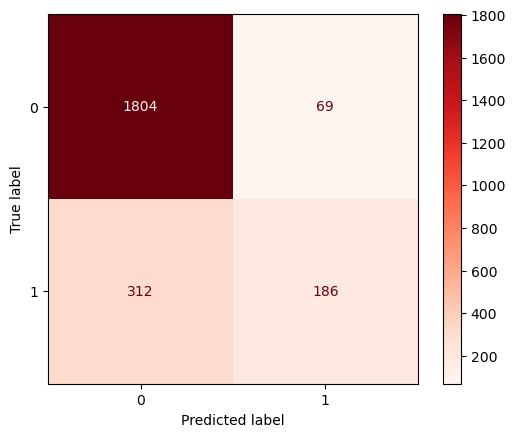

In [62]:
# Memprediksi model Logistic Regression:
y_pred_train = model_lr.predict(X_train_selected)

# Melihat hasil evaluasi:
print('F1 Score - Train Set  : ', f1_score(y_train, y_pred_train), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(model_lr, X_train_selected, y_train, cmap='Reds'))

***Insight:***

*Overall, this Logistic Regression model appears to be good at classifying clients who do not default in the next month, with high levels of precision and recall, but has lower performance in identifying clients who default in the next month, which is reflected in the recall and F1 values -Low score for default next month.*

### **2. SUPPORT VECTOR MACHINE CLASSIFIER**

F1 Score - Train Set  :  0.5579078455790785 

Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.96      0.91      1873
           1       0.73      0.45      0.56       498

    accuracy                           0.85      2371
   macro avg       0.80      0.70      0.73      2371
weighted avg       0.84      0.85      0.84      2371
 

Confusion Matrix      : 


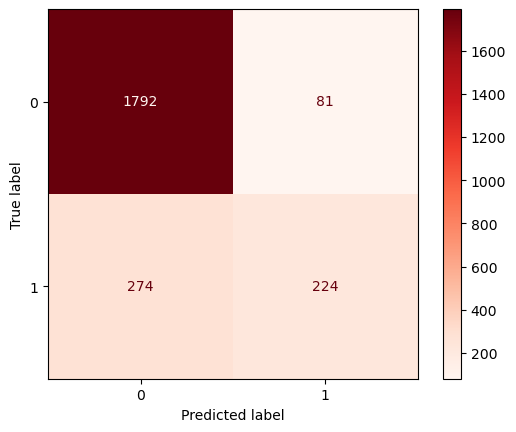

In [63]:
# Memprediksi model Logistic Regression:
y_pred_train = model_svc.predict(X_train_selected)

# Melihat hasil evaluasi:
print('F1 Score - Train Set  : ', f1_score(y_train, y_pred_train), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(model_svc, X_train_selected, y_train, cmap='Reds'))

***Insight:***

*Overall, this SVC model seems to have improved in classifying both classes, especially the next month default class, compared to the results from the previous Logistic Regression.*

### **3. K NEAREST NEIGHBORS**

F1 Score - Train Set  :  0.5160523186682521 

Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.93      0.90      1873
           1       0.63      0.44      0.52       498

    accuracy                           0.83      2371
   macro avg       0.75      0.68      0.71      2371
weighted avg       0.81      0.83      0.82      2371
 

Confusion Matrix      : 


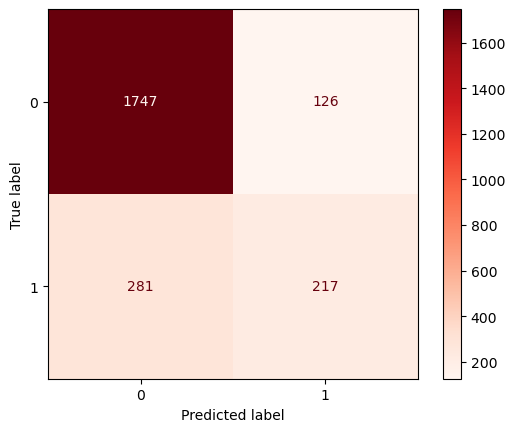

In [64]:
# Memprediksi model Logistic Regression:
y_pred_train = model_knn.predict(X_train_selected)

# Melihat hasil evaluasi:
print('F1 Score - Train Set  : ', f1_score(y_train, y_pred_train), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(model_knn, X_train_selected, y_train, cmap='Reds'))

***Insight:***

*Overall, this KNN model continues to improve in classifying clients who default next month, which is reflected in increased recall and F1-Score for defaults next month. The model seems to be getting better at distinguishing between defaults and non-defaults. This evaluation remains dependent on the problem context and specific business needs, but improvements in F1-Score and recall are positive signs for model performance. So it can be concluded that KNN is a suitable model for this project.*

---

# **XI. MODEL SAVING**

To make it easier to use later, all important processes that have been carried out in the sections above can be saved. This will really save time if we want to make predictions on new data later.

In [65]:
# Menyimpan seluruh proses:

with open('model_lr.pkl', 'wb') as file_1:
  joblib.dump(model_lr, file_1)

with open('model_svc.pkl', 'wb') as file_2:
  joblib.dump(model_svc, file_2)

with open('model_knn.pkl', 'wb') as file_3:
  joblib.dump(model_knn, file_3)

with open('list_num_cols.txt', 'w') as file_4:
  json.dump(num_features, file_4)

with open('list_cat_cols_ohe.txt', 'w') as file_5:
  json.dump(cat_ohe, file_5)

with open('list_selected_columns.txt', 'w') as file_6:
  json.dump(selected_columns, file_6)

---

# **XII. MODEL INFERENCE**

### **1. MODEL LOADING**

In [66]:
# Membuka file proses yang sudah disave sebelumnya:
with open('model_lr.pkl', 'rb') as file_1:
  model_lr = joblib.load(file_1)

with open('model_svc.pkl', 'rb') as file_2:
  model_svc = joblib.load(file_2)

with open('model_knn.pkl', 'rb') as file_3:
  model_knn = joblib.load(file_3)

with open('list_num_cols.txt', 'r') as file_4:
  num_features = json.load(file_4)

with open('list_cat_cols_ohe.txt', 'r') as file_5:
  cat_ohe = json.load(file_5)

with open('list_selected_columns.txt', 'r') as file_6:
  selected_columns = json.load(file_6)

### **2. CREATE A NEW DATAFRAME**

In [67]:
# Membuat dataframe baru:
new_data = pd.DataFrame({
    'pay_sept':[0.0, 4.0, 3.0, 0.0, 0.0],
    'pay_aug':[0.0, 0.0, 2.0, 2.0, 0.0],
    'pay_jul':[0.0, 6.0, 9.0, 0.0, 0.0],
    'pay_jun':[0.0, 0.0, 0.0, 4.0, 0.0],
    'pay_may':[0.0, 0.0, 0.0, 5.0, 1.0],
    'pay_apr':[0.0, 5.0, 7.0, 0.0, 0.0]
})

In [68]:
# Melihat data
new_data

,pay_sept,pay_aug,pay_jul,pay_jun,pay_may,pay_apr
0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,0.0,6.0,0.0,0.0,5.0
2,3.0,2.0,9.0,0.0,0.0,7.0
3,0.0,2.0,0.0,4.0,5.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0


### **LOGISTIC REGRESSION**

In [69]:
# Membuat salinan dari dataframe baru:
new_data_lr = new_data.copy()

In [70]:
# Melakukan prediksi menggunakan model:
model_lr.predict(new_data_lr)

array([0, 1, 1, 0, 0])

In [71]:
# Memasukkan hasil sebelumnya ke dalam dataframe data baru:
new_data_lr['default'] = model_lr.predict(new_data_lr)

In [72]:
# Melihat data:
new_data_lr

,pay_sept,pay_aug,pay_jul,pay_jun,pay_may,pay_apr,default
0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,4.0,0.0,6.0,0.0,0.0,5.0,1
2,3.0,2.0,9.0,0.0,0.0,7.0,1
3,0.0,2.0,0.0,4.0,5.0,0.0,0
4,0.0,0.0,0.0,0.0,1.0,0.0,0


### **SVM CLASSIFIER**

In [73]:
# Membuat salinan dari dataframe baru:
new_data_svc = new_data.copy()

In [74]:
# Melakukan prediksi menggunakan model:
model_svc.predict(new_data_svc)

array([0, 1, 1, 1, 0])

In [75]:
# Memasukkan hasil sebelumnya ke dalam dataframe data baru:
new_data_svc['default'] = model_svc.predict(new_data_svc)

In [76]:
# Melihat data:
new_data_svc

,pay_sept,pay_aug,pay_jul,pay_jun,pay_may,pay_apr,default
0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,4.0,0.0,6.0,0.0,0.0,5.0,1
2,3.0,2.0,9.0,0.0,0.0,7.0,1
3,0.0,2.0,0.0,4.0,5.0,0.0,1
4,0.0,0.0,0.0,0.0,1.0,0.0,0


### **K NEAREST NEIGHBORS**

In [77]:
# Membuat salinan dari dataframe baru:
new_data_knn = new_data.copy()

In [78]:
# Melakukan prediksi menggunakan model:
model_knn.predict(new_data_knn)

array([0, 1, 1, 0, 0])

In [79]:
# Memasukkan hasil sebelumnya ke dalam dataframe data baru:
new_data_knn['default'] = model_knn.predict(new_data_knn)

In [80]:
# Melihat data:
new_data_knn

,pay_sept,pay_aug,pay_jul,pay_jun,pay_may,pay_apr,default
0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,4.0,0.0,6.0,0.0,0.0,5.0,1
2,3.0,2.0,9.0,0.0,0.0,7.0,1
3,0.0,2.0,0.0,4.0,5.0,0.0,0
4,0.0,0.0,0.0,0.0,1.0,0.0,0


*From these results it can be proven that the model that has been created can predict the data appropriately. The best model for predicting which clients will default next month is the SVC model.*

---

# **XIII. CONCEPTUAL PROBLEMS**

**Answer the following questions:**

1. What is meant by coefficient in logistic regression?

2. What is the function of kernel parameters in SVM? Explain one of the kernels that you understand!

3. How do you choose the optimal K in KNN?

4. What is meant by the following metrics: Accuracy, Precision, Recall, F1 Score, and when is the right time to use them?

### **1. COEFICIENT IN LOGISTIC REGRESSION**

So, by looking at the coefficients and intercepts that I have obtained in the model evaluation section, it can be interpreted that the client's monthly payment history significantly influences the probability of default in the following month, with payments being delayed in previous months. Intercept is the next month's default probability when all payments are on time. The higher this probability, the greater the probability of default (the client will default in the next month).

### **2. WHAT IS KERNEL PARAMETER IN SVM?**

The RBF (Radial Basis Function) kernel is a type of kernel commonly used in the Support Vector Machine (SVM) algorithm for classification and regression problems. The RBF kernel has a functional form similar to a Gaussian or radial distribution, which allows it to handle nonlinear data well.

By using the RBF kernel in the SVC model, it allows the model to handle complex and non-linear data well, by transforming the data into a high-dimensional space representation that is more suitable for class separation.

### **3. HOW TO CHOOSE THE OPTIMAL K IN KNN MODEL**

Choosing the optimal K value (number of nearest neighbors) in the K-Nearest Neighbors (KNN) model is an important process in model development. Choosing the right K value can affect the performance and generalization of the model.

The method that can be used to find the optimal K value is to use the help of Grid Search or Random Search to carry out repeated or random searches on various hyperparameter combinations, including the K value, to find the combination that provides the best results based on the specified evaluation metrics.

### **4. WHAT IS ACCURACY, PRECISION, RECALL, AND F1 SCORE METRIC? AND WHEN TO USE IT?**

**Accuracy:**

- *Definition*: Accuracy is the ratio of correct predictions (both positive and negative) compared to the total number of instances in the dataset. It measures the overall correctness of the model's predictions.

- *When to use*: Accuracy is a commonly used metric in many classification tasks, including credit card default prediction. This provides an overview of the extent to which the model performs across all classes (defaulted and non-defaulted).

**Precision:**

- *Definition*: Precision is the ratio of true positive predictions to the total number of positive predictions made by the model. It measures the accuracy of positive predictions and answers the question, "Of all the agencies predicted to default, how many actually defaulted?"

- *When to use*: In the context of credit card default prediction, precision is important when wanting to minimize false positives. High precision means wanting to ensure that when the model predicts default, it is very likely to be correct. This metric is useful when false positives are particularly detrimental, such as when wanting to avoid incorrectly marking non-defaulting customers as defaulters.

**Recall:**

- *Definition*: Recall is the ratio of predicted true positives to the total number of actual positives in the dataset. This measures the model's ability to identify all positive instances and answers the question, "Of all actual defaults, how many were predicted correctly?"

- *When to use*: In the context of credit card default prediction, recall is very important when wanting to minimize false negatives. High recall means we want to catch as many true cases of default as possible. This metric is relevant when missing payment defaults can have significant financial consequences and we want to ensure the model is able to capture as many defaulted customers as possible.

**F1 Score:**

- *Definition*: F1 Score is the harmonic average of precision and recall. This provides a balance between precision and recall, because it takes into account false positives and false negatives. This is especially useful when there is an imbalance between two classes (defaulted and non-defaulted) in the dataset.

- *When to use*: F1 Score is a good metric when we want to strike a balance between making accurate positive predictions (high precision) and capturing as many actual positives as possible (high recall). It is often used when the distribution of classes in a dataset is unbalanced.

---

# **XIV. MODEL ANALYSIS**

**1. LOGISTIC REGRESSION MODEL:**

Excess:
- *Simple and easy to interpret. The coefficient value can provide insight into the factors that influence the likelihood of default.*
- *Logistic regression results can be interpreted as a probability of default, so they can be used to classify risks more clearly.*

Lack:
- *Not able to handle non-linear relationships between predictor variables and target variables.*
- *Less flexible in handling outliers compared to some other models such as SVC or KNN.*
- *Requires the assumption of independence between predictor variables, which may not always be met in banking data.*

**2. SUPPORT VECTOR CLASSIFIER (SVC) MODEL:**

Excess:
- *Can handle non-linear data through the use of kernels, such as the RBF kernel.*
- *Tends to be more tolerant of outliers compared to Logistic Regression.*
- *Able to separate potentially overlapping classes in a higher feature space.*

Lack:
- *SVC performance may be affected by the choice of kernel parameters and other hyperparameters.*
- *Does not provide a direct interpretation of the factors that influence predictions, so it is less intuitive to understand.*

**3. K-NEAREST NEIGHBORS (KNN) MODEL:**

Excess:
- *Does not require certain assumptions about data distribution.*
- *Easy to implement and understand.*
- *Can handle data that is not linear and has the potential for different clusters.*

Lack:
- *Vulnerable to scale changes and variations in attributes due to using distance metrics.*
- *KNN can be computationally heavy, especially with large amounts of data.*
- *Choosing the right K value (number of nearest neighbors) can influence the prediction results.*

To obtain optimal results in credit card default modeling, we can consider conducting experiments with all these three models and performing parameter tuning accordingly. Additionally, ensemble learning and other methods such as Decision Trees or Random Forests can also be explored to improve model performance.

---

# **XV. CONCLUSION**

In this project I used Variance Threshold and SelectKBest to find the best features that can be used to predict whether a client will default on their credit card next month. In the feature selection, I found that the significant factors that influence credit card payment failure are the feature columns: pay_sept, pay_aug, pay_jul, pay_jun, pay_may, pay_apr. This feature column contains historical data that shows whether the client paid on time or was in arrears, and how many months in arrears.

In this project I also use hyperparameter tuning techniques to find the best hyperparameters that the model can use on this data. This technique really helps increase the efficiency of project work and provides better results.

As a conclusion and to answer the main objective of this project, namely: creating a machine learning model to predict whether a client will default on their credit card in the next month and analyzing the data to identify significant factors that influence the probability of credit card default, it can be concluded that the Logistic model Regression, SVM Classifier, and K Nearest Neighbors can be used well to predict which clients will default on their credit cards next month. However, of the three models, the best model is the SVM Classifier.

---

# **XVI. FURTHER IMPROVEMENT**

To perfect this project, further development can be carried out by using a pipeline mechanism for feature engineering processes to model training. The pipeline mechanism can shorten time, streamline coding syntax, and there is no need to repeat steps to be carried out. Apart from that, the pay_sept - pay_apr feature column can be encoded using an ordinal encoder because this column contains historical data on payments and payment arrears. The more months in arrears means it will have a direct effect on the model's predictions later, and if it has been encoded using an ordinal encoder, later we can determine predictions more accurately.

---